# Proyecto de aprendizaje profundo - Fashion MNIST

Oliver Burguete López A01026488

Carlos Alfonso Alberto Salazar A01026175



## Introducción



Las redes neuronales son modelos que tratan de emular el comportamiento del cerebro para que las maquinas puedan hacer tareas similares a las que haría una persona, los problemas que buscan resolver son los problemas que son faciles para el ser humano pero dificiles para las maquinas. Estas estan formadas por una serie de neuronas artificiales que son funciones matematicas, esto quiere decir que reciben un valor númerico, lo transforman y lo devuelven. Estas usan una serie de elementos como:
- **Función de activación**: lo que hace es que determina como será la función, en este caso las dos funciones de activación que se utilizaran son Relu y Softmax, siendo Relu una función lineal para valores positivos y 0 para negativos, mientras que softmax una función con forma de S que da los valores negativos a 0 y los positivos a 1.
- **Bias**: Sirve como sesgo, que es un valor adicional para que capture la parte invariable de la predicciónm esto porque sin sesgo el limite de decisión siempre pasaría por el 0.
- **DropOut**: evita el overfitting desactivando aleatoriamente un porcentaje de las neuronas de la capa.
- **Convolución**: Extrae información por medio de un kernel generando una tercer matriz por medio de dos.
- **Maxpooling**: Reduce las dimensiones de una convolución, por lo que reduce los parametros.
- **BatchNormalization**: Normaliza por medio de lotes para estabilizar el modelo y reduce dastricamente la cantidad de epocas de entrenamiento.

En este proyecto se crearan dos modelos de red neuronales por los medio los cuales se identificara que tipo de prenda se muestra en una imagen y la clasificara. Para esto se utilizará el lenguaje de programación Python y se usaran algunas librerías como lo son Tensorflow, para la creación de los modelos, matplotlib para graficar y sklearn.

### Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, MaxPool2D, Dropout, BatchNormalization, Activation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Descargar el conjunto de datos

Los datos se obtendran por medio de una librería de tensorflow llamada "fashion mnist" la cual tiene 70,000 imagenes de prendas de ropa las cuales se encuentran en escalas de grises y tienen una dimensión de 28x28.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### División de los datos
Dividiremos los datos en 3 conjuntos: entrenamiento, validación y prueba.

Al importar los datos de fashion mnist, y guardarlos en las variables de train y test como se hizo en el chunk de código de arriba, inmediatamente se guardó una cierta cantidad para el train y la restante para el test.

Del total de los datos del train, seleccionaremos un 20% para validación, dejando el 80% restante en los datos de entrenamiento.

De esta manera, tenemos suficientes datos para entrenar el modelo y validar los resultados, así como validar el modelo contra los datos reales.

Teniendo entonces:
- Datos train = 48000
- Datos test = 10000
- Datos validation = 12000


In [ ]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# Revisar cuál es el 20% de los datos
print(len(x_train) * 0.20)

12000.0


In [ ]:
# Reservar ese 20% para validación
x_val = x_train[-12000:] #  -> 20%
y_val = y_train[-12000:] #  -> 20%

x_train = x_train[:-12000] #  -> 80%
y_train = y_train[:-12000] #  -> 80%

In [ ]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


In [ ]:
# Tamaño del conjunto de datos de validación
print(x_val.shape)
print(y_val.shape)

(12000, 28, 28)
(12000,)


### Normalización de las imágenes

Una vez separado los datos, nos será de mucha utilidad reescalar las imágenes, es decir, que su tamaño vaya de 0 a 1.   

In [ ]:
#Imprimir valores de la imágen
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [ ]:
# Reescalar imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [ ]:
#Imprimir los valores normalizados de la imágen
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


### Visualizar los datos

Para tener una mejor idea de como vienen las imagenes se visualizaran 100 de estas con su clase en un grid 10x10, esto con ayuda de la librería de python, matplotlib.

In [ ]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

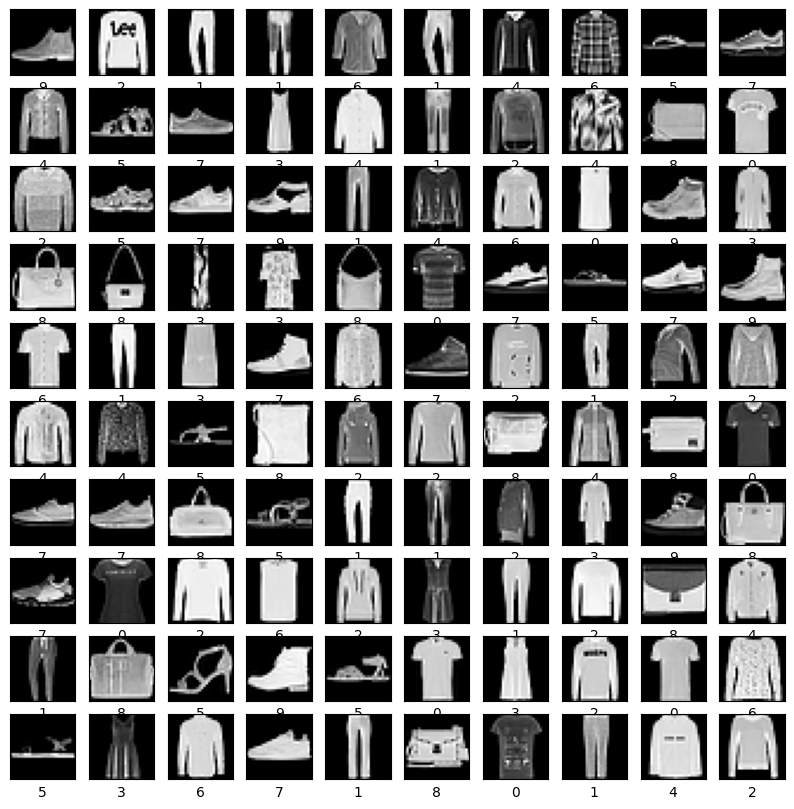

In [ ]:
visualize_dataset(10,x_test,y_test)

Ya sabiendo el formato en el que viene las imagenes se visualizará cuantas imagenes vienen de cada clase, notando que todas tienen un número de elementos muy similares, todas alrededor de 4700 y 4900.

In [ ]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()

Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [4764 4794 4768 4796 4785 4806 4851 4820 4820 4796]


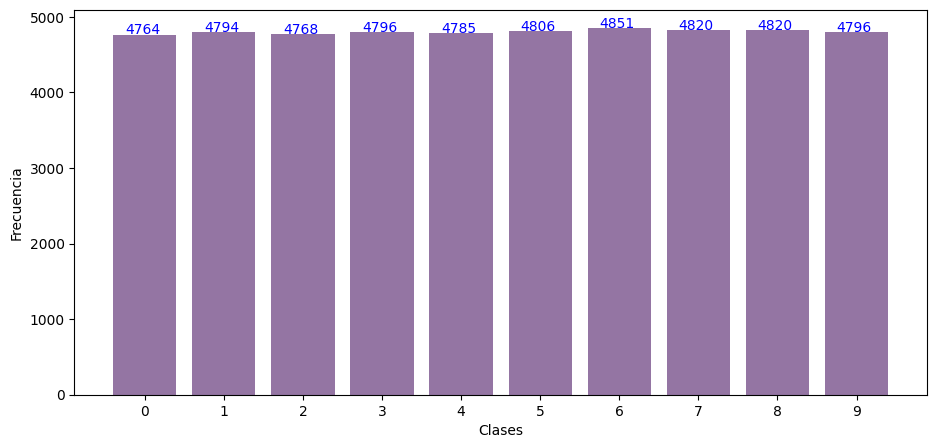

In [ ]:
visualize_labels(y_train, True)

# Modelo 1

### Explicación del modelo
Para el primer modelo usamos una arquitectura con un total de 6 capas
- **Capa 1:**
Se inicia con una capa convulacional, que tiene 64 filtros, un kernel de 3x3, stride y el padding = "same" significa que sí se aplica. Al aplicar el stride de 1 y el padding el output sale del mismo tamaño.
A esta capa también se le aplica una capa de batch normalization, seguido de la activación con relu; una capa donde decidimos hacer un max pooling y al final, para evitar overfitting hacemos un dropout del 30%.

- **Capa 2:**
Aplicamos otra capa convolucional, en este caso, subimos los filtros a 128, y reducimos el kernel a uno de 2x2 para poder maximizar las extracción de características; el stride (1) y pading se mantienen igual. De igual manera, se agrega un batch normalization, y el max pooling también lo reducimos ahora a una matriz 2x2. Finalmente, aplicamos el mismo dropout del 30% para evitar overfitting.

- **Capa 3:**
Se aplica una capa flatten a los datos que vienen de las 2 últimas capas

- **Capa 4:**
Se aplica una capa con activación relu y con 128 neuronas, a la que se le aplica un batch normalization y un dropout del 40%, para evitar el overfitting, ya que tras prueba y error, notamos que estas capas sin un dropout de este tamaño hace que el modelo tienda más a hacer overfitting.

- **Capa 5:**
Aplicamos lo mismo que la capa pasada, pero bajamos las neuronas de 128 a 64, seguimos con activación relu, batchnormalization y un dropout de 40%. Con estas 2 capas estamos listos para poder clasificar.

- **Capa 6:**
La útlima capa, la capa de salida con un total de 10 neuronas y una activación softmax para poder clasificar entre las 10 opcinoes de prendas que tiene la base de datos.

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),1,padding='same')) #filters (64), kernel (3,3), stride (1), padding (yes)  -> cuando hay padding y stride de 1, el output es del mismo tamaño
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(2,2),1,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

Para entrenamiento, se va a entrenar con el optimizador adam y usando el categorical cross entropy como función de error, ya que consideramos que en base al problema, son los mejores parámetros.

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #optimizer, loss, metric

In [ ]:
model.build((None, 28, 28, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         3

Para explicar el cálculo de los parámetros en cada capa, primero tenemos que recordar que el tamaño de la imágen original es de 28x28x1, ya que solo tiene un canal (porque son imágenes en blanco y negro).

**Capa 1:**
- Al aplicar la capa convolucional con 64 filtros, este cambia la estructura de la imágen a 28x28x64, y para calcular el parámetro tenemos que hacer la operación: $[(3\times 3 \times 1)+1]\cdot 64=640$. Donde se multiplica el kernel, por los filtros de la capa anterior, más el bias (1) y finalmente se multiplica por el nuevo filtro.

- Posteriormente, el batch normalization es 4 veces los filtros, es deicr $64\cdot 4 = 256$.

- La activación no tiene ningún parámetro.

- Al ser un max pooling de 3x3, y tener una matriz en las imagenes de 28x28, esta se disminuye a una matriz de 9x9 y se mantienen los 64 filtros.

**Capa 2:**
- Al aplicar la capa convolucional con 128 filtros, este cambia la estructura de la imágen a 9x9x128, y para calcular el parámetro tenemos que hacer la operación: $[(2\times 2 \times 64)+1]\cdot 128=640$. Donde se multiplica el kernel, por los filtros de la capa anterior (64), más el bias (1) y finalmente se multiplica por el nuevo filtro (128).

- Posteriormente, el batch normalization es 4 veces los filtros, es deicr $128\cdot 4 = 512$.

- La activación no tiene ningún parámetro.

- Al ser un max pooling de 2x2, y tener una matriz en las imagenes de 9x9, esta se disminuye a una matriz de 4x4, y se mantienen los 128 filtros.

**Capa 3:**
- La capa flatten no tiene parámetros más y su tamaño se calcula simplemente multiplicando lo de la capa anterior: $4\cdot4\cdot128=2048$

**Capa 4:**
- El tamaño de esta capa es el número de neuronas que esta tiene, en este caso 128, y sus parámetros se calculan usando los parámtros que entran por los que salen y sumado por estos últimos: $(1048\cdot128)+128=262272$

- Posteriormente, el batch normalization es 4 veces los filtros, es deicr $128\cdot 4 = 512$.

**Capa 5:**
- El tamaño de esta capa es el número de neuronas que esta tiene, en este caso 128, y sus parámetros se calculan usando los parámtros que entran por los que salen y sumado por estos últimos: $(128\cdot64)+64=8256$

- Posteriormente, el batch normalization es 4 veces los filtros, es deicr $64\cdot 4 = 256$.

**Capa 6:**
- Finalmenre, el tamaño de esta capa es el número de neuronas que esta tiene, en este caso 10, que son por los 10 tipos de prenda que existe, y sus parámetros se calculan usando los parámtros que entran por los que salen y sumado por estos últimos: $(64\cdot10)+10=650$

En total, el modelo entrena un total de 306250 parámetros, lo que en términos de memoria, esto representa 1.17 MB.


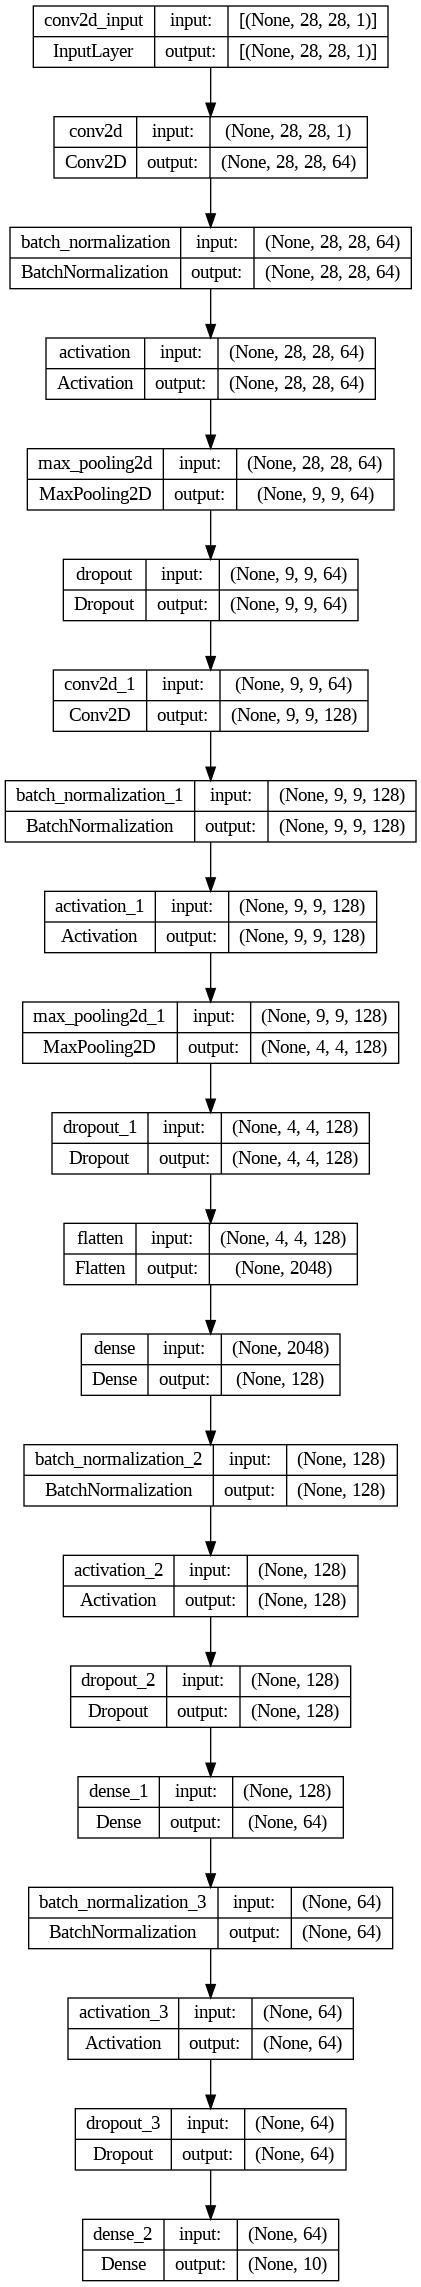

In [ ]:
plot_model(model, show_shapes=True)

En este caso se eligió una paciencia de 4, lo que quiere decir que si el monitor, en este caso "val_loss" no es "min" (por el modo) el modelo se dejará de entrenar y hará un early stopping.

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=4,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("/content/drive/My Drive/5° Semestre/Diseño de redes neuronales y aprendizaje profundo/best_MNIST_reto.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')


### Entrenamiento del modelo


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),callbacks=[es, checkpoint] ,epochs=50,verbose=1)

Epoch 1/50
1492/1500 [============================>.] - ETA: 0s - loss: 0.7210 - accuracy: 0.7511
Epoch 1: val_loss improved from inf to 0.37958, saving model to /content/drive/My Drive/5° Semestre/Diseño de redes neuronales y aprendizaje profundo/best_MNIST_reto.h5
1500/1500 [==============================] - 25s 7ms/step - loss: 0.7199 - accuracy: 0.7515 - val_loss: 0.3796 - val_accuracy: 0.8633
Epoch 2/50
  19/1500 [..............................] - ETA: 8s - loss: 0.4661 - accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1494/1500 [============================>.] - ETA: 0s - loss: 0.4715 - accuracy: 0.8381
Epoch 2: val_loss improved from 0.37958 to 0.32073, saving model to /content/drive/My Drive/5° Semestre/Diseño de redes neuronales y aprendizaje profundo/best_MNIST_reto.h5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4714 - accuracy: 0.8381 - val_loss: 0.3207 - val_accuracy: 0.8810
Epoch 3/50
1500/1500 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8530
Epoch 3: val_loss improved from 0.32073 to 0.29933, saving model to /content/drive/My Drive/5° Semestre/Diseño de redes neuronales y aprendizaje profundo/best_MNIST_reto.h5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4245 - accuracy: 0.8530 - val_loss: 0.2993 - val_accuracy: 0.8870
Epoch 4/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.3985 - accuracy: 0.8593
Epoch 4: val_loss improved from 0.29933 to 0.28601, saving model to /content/drive/My Drive/5° Semestre

### Evaluación del modelo

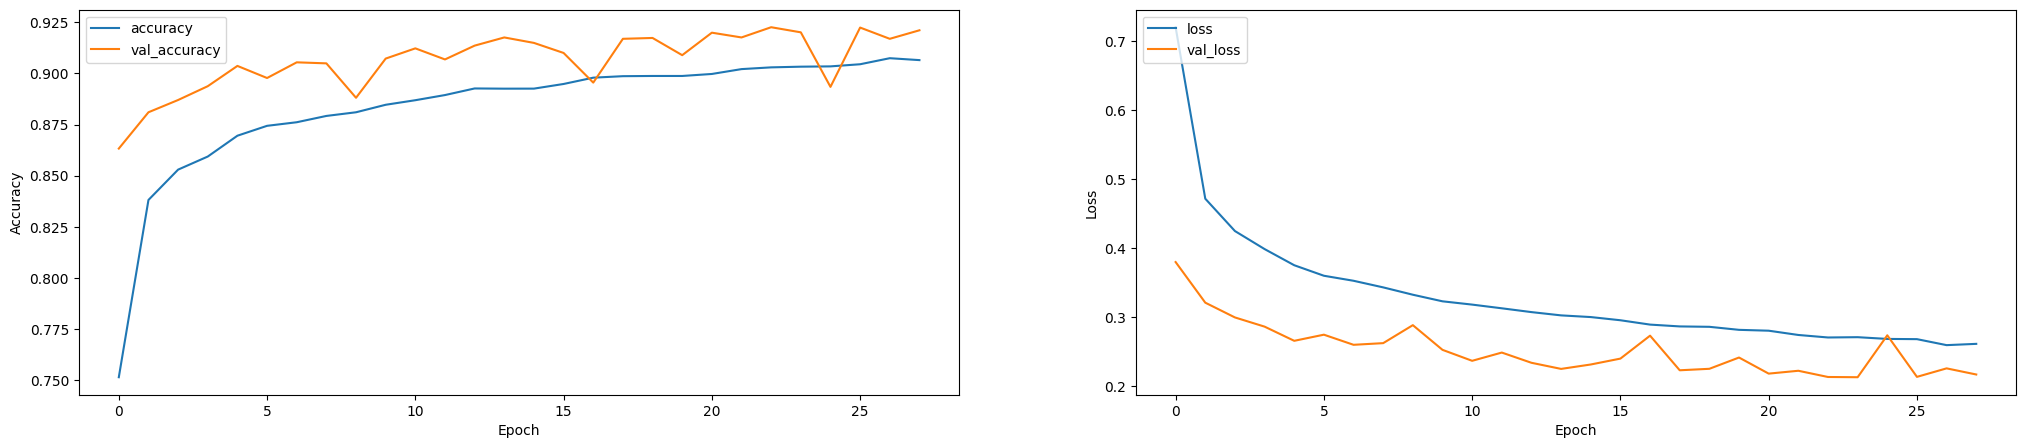

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.91
Test loss: 0.24


Para empezar, notamos que tuvo un accuracy de 0.91 que consideramos bueno, especialmente sabiendo la cantidad de datos con la que se está trabajando, como podemos ver en la gráfica de la izquierda, donde se compara el accuracy con respecto a las épocas, notamos que inica con un buen rendimineto y a partir de ahí va mejorando, pero con 3 picos muy evidentes en su rendimiento. Aún con estos picos logra subir su rendimiento y pasar la barrera del 0.90.

Por otro lado, en la segunda gráfica, donde se compara la pérdida contra las épocas, vemos que no hay mucha pérdida, y que las líneas no están muy separadas la una de la otra, notamos un poco de overfitting pero nada que nos diga que el modelo no pueda funcionar con otros datos. Además, vemos que al final tiene una tendencia a bajar su pérdida.

En general es un buen modelo, pero ahora haremos una segunda arquitectura y compararemos ambos modelos para elegir el mejor.

# Modelo 2

1. En este segundo modelo se inicia con una capa convulucional con un filtro de 128 y un kernel de 3x3, stride y padding de 1, posteriormente se hace una activación tipo relu seguido de un maxpooling de tamaño 3x3 y finalmente a esa capa se le aplica un dropout del 30% para evitar overfitting.
2. Capa convolucional pero esta vez de un filtro de 256 y un kernel 2x2 seguido de una normalización batch, a esta capa se le agrega  una activación relu.
3. Capa relu con 64 neuronas.
4. capa softmax con 64 neuronas y un dropout de 30%.
5. Se aplica Flatten a las 4 capas anteriores.
6. Capa relu con 128 neuronas y un dropout de 40% por su gran cantidad de neuronas.
7. Capa Softmax con 128 neuronas y 40% de dropout.
8. Capa Softmax con 64 neuronas y un dropout de 20%.
9. Capa de salida Softmax por ser clasificación con 10 que son la cantidad de labels que tiene el modelo.

In [ ]:
model2 = Sequential()

model2.add(Conv2D(128,(3,3),1,padding='same')) #filters (128), kernel (3,3), stride (1), padding (yes)  -> cuando hay padding y stride de 1, el output es del mismo tamaño
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.3))

model2.add(Conv2D(256,(2,2),1,padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dense(64, activation = "relu"))

model2.add(Dense(64, activation = "softmax"))
model2.add(Dropout(0.3))

model2.add(Flatten())

model2.add(Dense(128, activation = "relu"))
model2.add(Dropout(0.4))

model2.add(Dense(128, activation = "softmax"))
model2.add(Dropout(0.4))

model2.add(Dense(64, activation = "softmax"))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #optimizer, loss, metric

In [ ]:
model2.build((None, 28, 28, 1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 9, 9, 128)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 9, 9, 128)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 256)        

**Capa 1:**
- Al aplicar la capa convolucional con 128 filtros, este cambia la estructura de la imágen a 28x28x128, y para calcular el parámetro tenemos que hacer la operación: $[(3\times 3 \times 1)+1]\cdot 128=1280$. Donde se multiplica el kernel, por los filtros de la capa anterior, más el bias (1) y finalmente se multiplica por el nuevo filtro.

- Posteriormente, el batch normalization es 4 veces los filtros, es deicr $128\cdot 4 = 512$.

- La activación no tiene ningún parámetro.

- Al ser un max pooling de 3x3, y tener una matriz en las imagenes de 28x28, esta se disminuye a una matriz de 9x9 y se mantienen los 128 filtros, por lo que el shape es de (9,9,128)

**Capa 2:**
- Se le aplica una capa convulución de 256 filtros y un kernel de 2x2 a la tercer dimension que es de 128, por lo que el parametro de calcula (256*2*2*128)+256 = 131,328.

- Se le aplica un batch que es 4 veces los filtros, es decir: 256*4 = 1,024.
- La capa de activación no cambia los parametros.

**Capa 3:**

- Se aplica unca capa Dense con 64 neuronas y activación relu que multiplica por 64 el tercer elemento de la matriz: (256 + 1)*64 = 16,448 y el shape pasa a ser (9, 9, 64).

**Capa 4:**

- Se aplica una capa dense de 64 neuronas con activación softmax, es decir que el parametro pasa a ser ((64+1)*64)=4160 y el shape (9, 9, 64).

- Se aplica un Drop Out que no cambia la estructura.

**Capa 5.**
- La capa Flatten lo que hace es juntar las 3 dimensiones en una sola, por lo que al ser el shape de (9, 9, 64) el shape pasa a ser ùnico con el siguiente valor: $(9*9*64) = (5184)$.

**Capa 6:**
- Ya con solo una dimensión se aplica una capa dense de 128 neuronas con activaciòn relu, por lo que los parametros pasan a ser de: (128)*5184+128 = 663,680 y el shape de (128).

- Se aplica un dropout.

**Capa 7:**
- Se aplica una capa dense con 128 neuronas y activación Softmax, por lo que el parametro pasa a ser de (128*128)+128 = 16,512 y shape de (128).

- Se le aplica un Dropout de 40%.

**Capa 8:**
- Se le aplica una capa Dense de 64 neuronas y activación Softmax, quedndo el parametro (64*128)+64 = 8,256 y el shape de (64).

- Se le aplica un DropOut de 20%.

**Capa 9:**
- Finalmente se aplica una capa Dense de 10 neuronas y activaciòn Softmax para sacar los resultados de cada label, dando un shape final de 10 y parametro de (64+1)*10 = 650.

Al sumarse todos los parametros da como resulado 843,850 parametros que en memorìa es 3.22 MB

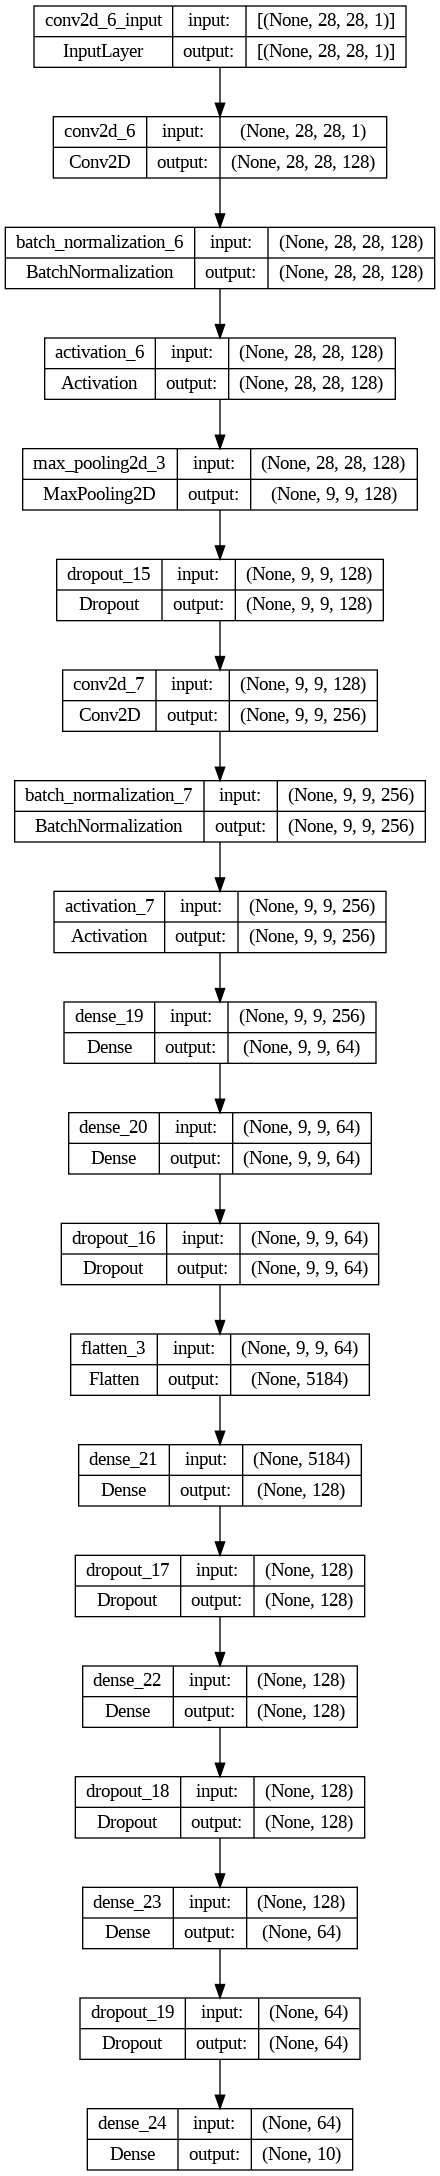

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val),callbacks=[es, checkpoint] ,epochs=50,verbose=1)

Epoch 1/50
1494/1500 [============================>.] - ETA: 0s - loss: 2.0762 - accuracy: 0.2517
Epoch 1: val_loss did not improve from 0.23257
1500/1500 [==============================] - 15s 8ms/step - loss: 2.0753 - accuracy: 0.2518 - val_loss: 1.5827 - val_accuracy: 0.3806
Epoch 2/50
1496/1500 [============================>.] - ETA: 0s - loss: 1.7427 - accuracy: 0.2766
Epoch 2: val_loss did not improve from 0.23257
1500/1500 [==============================] - 12s 8ms/step - loss: 1.7424 - accuracy: 0.2765 - val_loss: 1.3409 - val_accuracy: 0.4047
Epoch 3/50
1497/1500 [============================>.] - ETA: 0s - loss: 1.5656 - accuracy: 0.3243
Epoch 3: val_loss did not improve from 0.23257
1500/1500 [==============================] - 12s 8ms/step - loss: 1.5655 - accuracy: 0.3242 - val_loss: 1.2032 - val_accuracy: 0.4248
Epoch 4/50
1495/1500 [============================>.] - ETA: 0s - loss: 1.4025 - accuracy: 0.3796
Epoch 4: val_loss did not improve from 0.23257
1500/1500 [=======

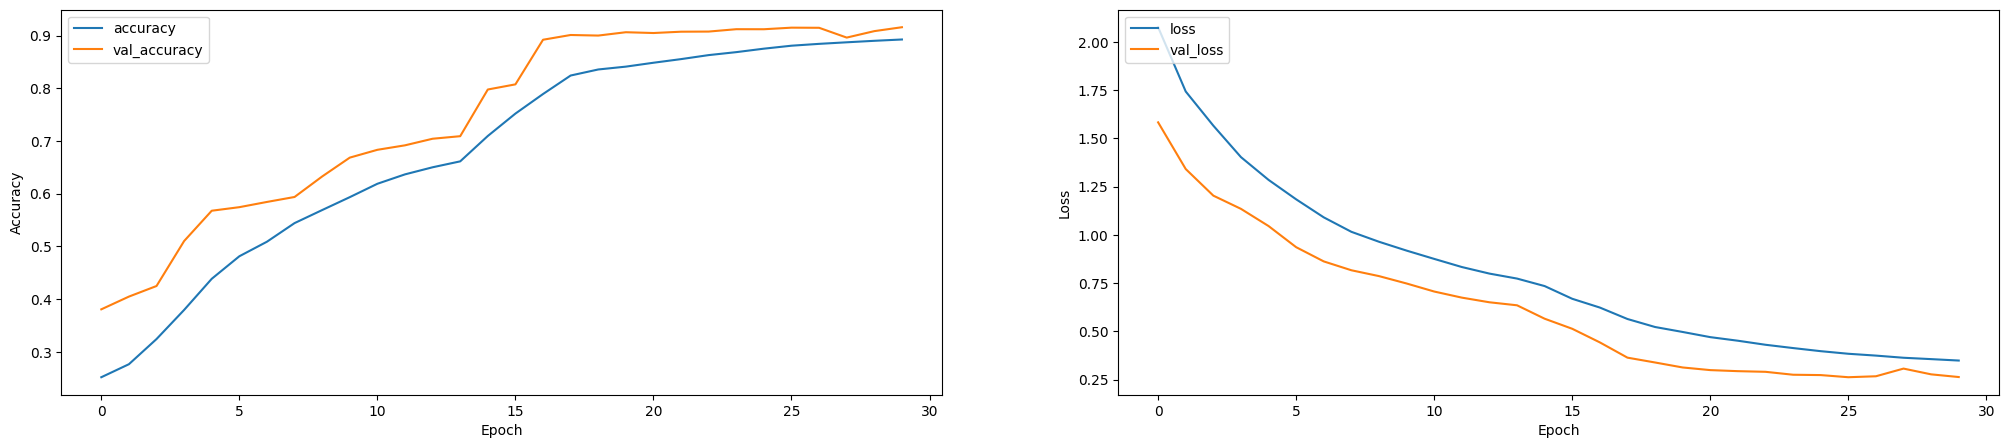

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history2.history['accuracy'], label='accuracy')
axs[0].plot(history2.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

axs[1].plot(history2.history['loss'], label='loss')
axs[1].plot(history2.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.91
Test loss: 0.28


En este segundo modelo podemos observar que en la primera época, el modelo tenía un accuracy muy bajo, por debajo de 0.4, y después de 30 épocas subió este accuracy hasta 0.91, que es un buen modelo considerando la cantidada de datos con la que se trabaja. Podemos notar que en la gráfica solo hubo un retroceso en el aprednizaje, y este fue justo antes de llegar al máximo.

En la segunda gráfica, notamos que la pérdida inició muy alta, que tiene sentido viendo que el modelo inició con muy poco accuracy, pero esta pérdida fue bajando gradualmente hasta llegar a 0.28. No notamos nada de overfitting, y al final esta se queda con tendencia a bajar aún más.

## Comparación y elección de modelo

Después de diseñar y entrenar 2 diferentes arquitecturas, notamos que ambas tienen el mismo accuracy: 0.91, por lo que nuestros 2 modelos son buenos prediciendo estos datos.

Pero, las diferencias se empiezan a notar en la pérdida de cada modelo, pues el modelo 1 tiene una menor pérdida, de 0.24, y el segundo tiene una pérdida de 0.28. Aunque no sea una gran diferencia, esto muestra que con el mismo accuracy, el modelo 1 tiene mejor rendimiento.

Aún más, si comparamos la arquitectura de cada uno, podemos ver que el primer modelo es casi la mitad de pesado que el segundo modelo. En cuanto a número de parámetros y memoria usada, el modelo 1 cuenta con 306250 parámetros y usa 1.17 MB, mientras que el modelo 2 cuenta con 843850 parámetros y usa 3.22 MB.

En cunato al overfitting, creemos que el modelo 1, aunque presenta un poco, no es suficiente para que falle. Y por el contrario, el modelo 2 no mostró nada de overfitting.

En conclusión, elegimos el modelo 1 como el mejor modelo ya que creemos que las diferencias entre la pérdida y el peso del modelo hacen que el modelo 1 sobresalga en la comparación donde ambos modelos tuvieron el mismo accuracy.

### Evaluación modelo y desempeño "real"

Una vez elegido el modelo 1 como el mejor de los 2, probaremos su desempeño real usando los datos que guardamos del x_test. Lo que haremos será usar el modelo para que ahora haga la predicción de estos datos, los cuáles no los ha visto.

Hacemos esto para comprobar la funcionalidad del modelo y donde también probaremos si es cierto que no tiene overfitting, ya que si hubiera overfitting, el modelo se entrenaría bien con los datos de train, pero no sabría diferenciar nuevos datos.

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 7])

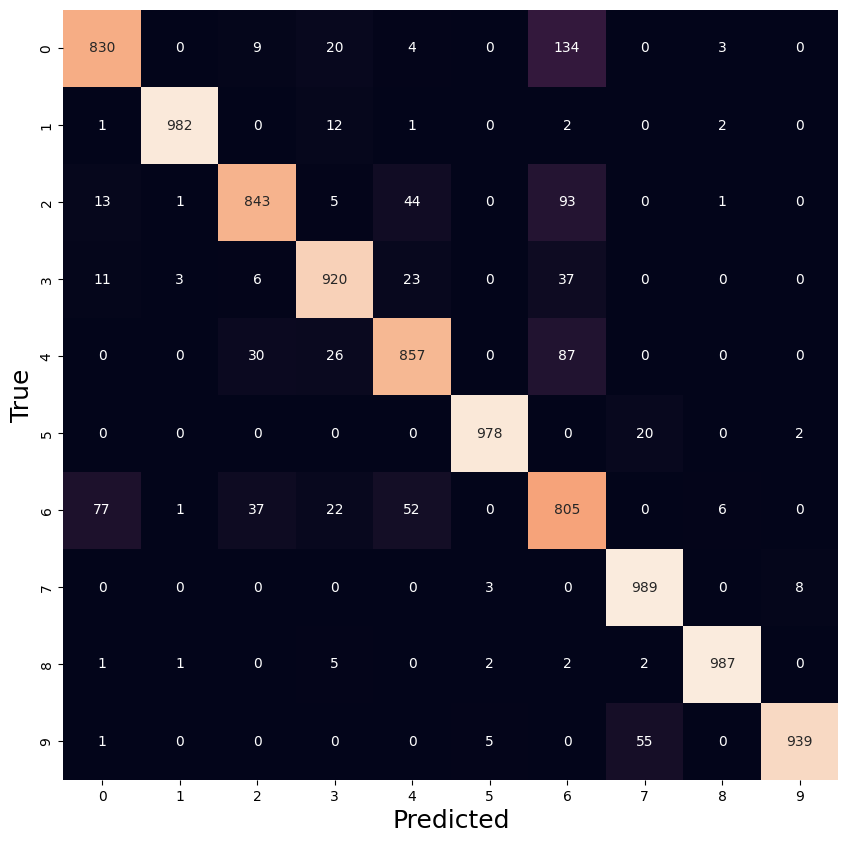

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

Hacemos una matriz de confusión para observar su rendimiento. Esta nos indica la cantidad de datos en los que acertó y en dónde tuvo más errores, por lo general, queremos ver toda la diagonal de la matriz en blanco, que indique que no se equivoco.

Analizando los resultados, podemos ver que efectivamente, el modelo fue un excelente modelo y que realmente funciona con datos externos a los que vió cuando se entrenó.

Podemos notar que las prendas marcadas como 0 y 6 fueron en las que más error hubo, pero fuera de estas, podemos estar seguros que el modelo clasificó bien los datos.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.84      0.88      1000
           3       0.91      0.92      0.92      1000
           4       0.87      0.86      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.69      0.81      0.75      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



Haciendo el reporte de esta clasificación, observamos que en todas las clases, menos en la 0, 4 y 6, tuvo una precisión por encima del 0.9, incluso llegando a 0.99.

Al final, su accuracy de 0.91 fue bastante buena para clasificar el modelo y podemos concluir con que la arquitectura diseñada cumple con su obetivo de buena manera.

# Conclusiones individuales

## Oliver Burguete
Personalmente este reto me sirvió para aprender mucho sobre las arquitecturas, funcionamiento y utilida de las redes neuronales. Este es uno de los temas que mas me apasiona y por tanto, disfruté cada etapa en el desarrollo del proyecto.

Podría decir que una de las mejoras evidentes, y es algo que está en investigación, es conocer mejor cuántas capas y neuronas se necesitan para un problema en particular como es la clasificación de imagenes. Estuvimos mucho tiempo haciendo varias arquitecturas y haciendo constantemente prueba y error hasta que salió un buen resultado dado los datos con los que trabajamos. Pero noté cómo sería de utilidad tener un cierto template o punto de partida para estos tipos de problemas.

Además, hablando un poco más acerca de nuestro modelo, que si bien tuvo un rendimiento aceptable, sin duda puede mejorar y lo ideal sería subir el accuracy por encima de 0.95, y bajar lo más posible el loss. Esto no lo pudimos hacer, aún cuando probamos una gran catidad de diferentes modelos, pero es algo que me gustaría desarrollar y probar otras arquitecturas y a lo mejor meterle más complejidad al modelo para alcanzar un rendimiento excelente.

En cuanto al trabajo en equipo, fue sencillo ya que nos entendemos muy bien. Nos dividimos el trabajo donde hicimmos un modelo cada quién, en este caso, yo hice el primer modelo. Para la parte de comparar los modelos nos ayudó la buena comunicación que tenemos y entre los 2 comparamos los elementos de cada uno para llegar a una conclusión final. De igual manera, nos dividimos y apoyamos en el reporte escrito para explicar de mejor manera cada uno de los pasos.

Disfruté mucho de meterme de lleno en el código y tratar de entender qué hacía cada parámetro. Busqué en la documentación de TensorFlow para conocer esto más a fondo y poder aplicarlo al proyecto.

## Carlos Alfonso
En este reto se aprendió a que son las redes neuronales, como funcionan y sus dinstintos componentes, además de como hacer la arquitectura de las mismas, este es un tema que cada vez es más relevante para el día a día y cada vez esta más en tendencia.
Un área de mejora es que es algo relativamente nuevo y no tiene una forma de tener un modelo especifico, lo que lleva a tener que hacer muchas pruebas y estar al tanteo, lo malo de esto es la cantidad de tiempo que llevaba probar cada modelo ya que por ejemplo en el modelo que realice pase por varios intentos y cada intento tomaba alreadedor de 8 minutos lo que hacia muy tardado el proceso, por lo que es importante ver que cosas van funcionando y que otras se pueden agregar para crear el mejor modelo.

En el caso del modelo entregado aunque no presento tantas señales de overfitting el rendimiento no fue el ideal ya que falla alrededor de 1 de cada 10 veces, lograr subirlo sin caer en overfitting o en un modelo muy pesado como el caso del segundo modelo que es muy pesado.

En cuanto a las actividades realizadas, ya había trabajado antes con mi compañero por lo que la comunicación fue muy sencilla, actividades que nos dividimos totalmente fue en la creación de modelos ya que él hizo uno y yo otro, en mi caso yo hice el modelo 2, se trató que las explicaciones y argumentaciones tuvieran el mismo formato. En cuanto al resto del documento y código a veces uno iniciaba la introducción y otro la completaba o viceversa.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to pdf /content/Reto_MNIST_Fashion.ipynb

[NbConvertApp] WARNING | pattern '/content/Reto_MNIST_Fashion.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru